In [1]:
library(pheatmap)
library(reshape2)
library(RColorBrewer)
library(EnvStats)
library(ggpubr)
library(Seurat)


Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm


The following object is masked from ‘package:base’:

    print.default


Loading required package: ggplot2

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”
Warning message:
“package ‘Seurat’ was built under R version 4.0.5”
Attaching SeuratObject



In [7]:
setwd("~/apc_mut_project/")
at = read.csv("~/apc_mut_project/GSE83333_series_matrix_apc_ko_day3_mice.csv", header= T, check.names= F,  stringsAsFactors =F, row.names = 1)

In [8]:
gpl2 = read.csv("GPL6885-11608 (1).txt", header = T,  stringsAsFactors = F, comment.char = "#", sep = "\t", check.names = F, row.names = 1)

In [9]:
names = toupper(gpl2[rownames(at), 11])
at = as.matrix(at)
rownames(at) = names
head(names)

[1] "CRADD"         "DSCR1L1"       "4933428A15RIK" "TCERG1L"      
[5] "A430031N04"    "STRAP"

In [10]:
ag = aggregate(at, list(names), median)
names = ag[,1]
ag = ag[, -1]
rownames(ag) = names

In [12]:
genes = read.table("APC_day_3", header = F, sep = "\t", stringsAsFactors = F)
genes = genes[,1]
genes = c(genes, "TEBP", "AXIN2", "FZD6")
int = intersect(genes ,rownames(ag))
genes = unique(genes)

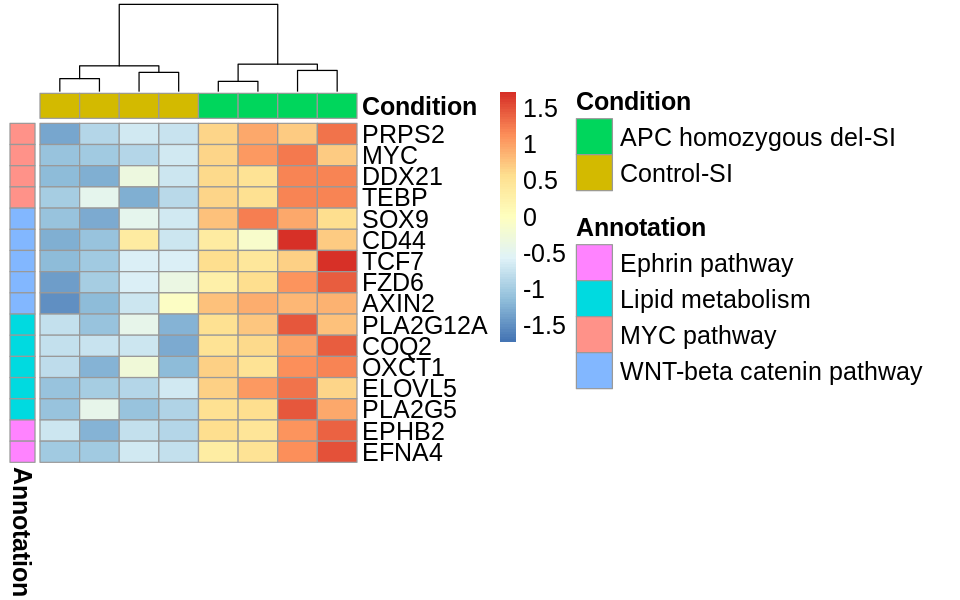

In [13]:
options(repr.plot.width=8, repr.plot.height=5)


ct = c("PRPS2", "MYC", "DDX21", "TEBP", "SOX9","CD44", "TCF7","FZD6", "AXIN2", "PLA2G12A", "COQ2", "OXCT1", "ELOVL5", "PLA2G5", "EPHB2", "EFNA4" )
names = c(rep("MYC pathway",4), rep("WNT-beta catenin pathway", 5), rep("Lipid metabolism", 5), rep("Ephrin pathway", 2))



dat = data.frame(Annotation = names, row.names = ct)

si = data.frame(Condition = c(rep("Control-SI", 4), rep("APC homozygous del-SI", 4)), row.names= colnames(ag))
pheatmap(log2(ag[ct, ]+1), scale = "row", annotation_row = dat, cluster_rows = F, annotation_col = si, show_colnames = F, fontsize = 15)

In [14]:

#### Bulk RNA seq of matched FAP and normal mucosa (adenomas)

#### bulk RNA seq

In [15]:
library(DESeq2)
library(edgeR)
si = read.csv("~/Downloads/GSE153385_patient_info.csv",  stringsAsFactors = F,  header= T, sep = "\t")
at = read.csv("~/Downloads/GSE153385_LS.FAP.patient.raw.read.counts.txt", header= T, stringsAsFactors = F, row.names = 1, sep = "\t")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The follow

In [16]:
si = si[, -1]
si = si[, grep("FAP", colnames(si))]
si = t(si)
si = as.data.frame(si)

In [17]:
names =gsub("_FAP.+$","", rownames(si))
patients = gsub("^.+_FAP","", rownames(si))
st = si[, c(1,6)]
st$patients = patients
rownames(st) = names

In [18]:
int = intersect(rownames(st), colnames(at))

In [19]:
reads = at[, int]
st = st[int, ]
si2 = si
si = st
idx = rownames(st)[which(st[, 2] == "batch: FAP3")]
si = st[idx, ]
reads2 = reads[, idx]

In [20]:
library ( edgeR )
library(DESeq2)
eDGElist <- DGEList ( counts = reads2 , group = si[,1] )
keep <- rowSums ( cpm ( eDGElist ) >= 1) >= 5
Dfs <- DESeqDataSetFromMatrix(countData = reads2[keep, ] ,
colData = si ,
design = ~patients+V1)
dds = DESeq(Dfs)
counts = counts(dds, normalized = T)
results <- results ( dds , independentFiltering = TRUE , alpha = 0.05)
results = na.omit(results)
resl = results[results$padj < 0.05, ]

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [21]:
c = c("SP5", "PITX2", "AXIN2", "NKD1", "CHGA", "DCLK1", "SST", "NEUROD1", "GCG", "MYC", "CCND1","SOX9")

In [24]:
si[,1] = as.factor(si[,1])
levels(si[,1]) 

[1] "NORMAL" "POLYP"

In [25]:
colnames(counts)

[1] "H_G108" "H_G110" "H_G79"  "H_G84"  "H_G85"  "H_G86"  "H_G87"  "H_G93" 
 [9] "H_G102" "H_G106" "H_G94"  "H_G95"  "H_G119" "H_G121"

In [27]:
colnames(counts) == rownames(si)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [31]:
polyp = which(si[,1] == "POLYP")
normal = which(si[,1] == "NORMAL")

In [32]:
si[polyp,3] == si[normal, 3]

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [33]:
lt = cbind(melt(counts[c, polyp]), melt(counts[c, normal]))


In [38]:
head(lt)

,Var1,Var2,value,Var1,Var2,value
,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>
1,SP5,H_G108,315.468592,SP5,H_G110,51.624159
2,PITX2,H_G108,1.130712,PITX2,H_G110,5.866382
3,AXIN2,H_G108,5498.651472,AXIN2,H_G110,1048.909055
4,NKD1,H_G108,525.780986,NKD1,H_G110,125.540569
5,CHGA,H_G108,1164.633152,CHGA,H_G110,7490.196205
6,DCLK1,H_G108,13.568542,DCLK1,H_G110,112.634529


In [39]:
si[ lt[,2], 3] == si[lt[,5], 3]

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [40]:
lt = lt[, c(1, 3,6)]

In [41]:
colnames(lt)= c("Gene", "Polyp", "Normal")

In [42]:
lt[,2] = log2(lt[,2]+1)
lt[,3] = log2(lt[,3]+1)

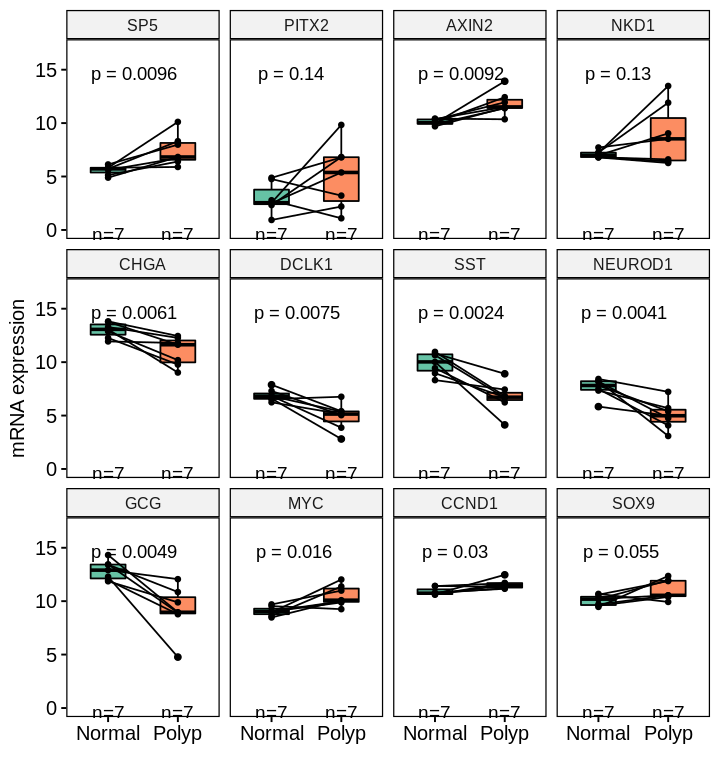

In [53]:
options(repr.plot.width=6, repr.plot.height=6.5)

p = ggpaired(lt, cond1 = "Normal", cond2 = "Polyp",
    fill = "condition", palette = "Set2", facet.by = "Gene", xlab = "", ylab = "mRNA expression", ylim = c(0, 17))
p = p + stat_compare_means( label = "p.format", method = "t.test", paired = T, label.y = 14)
p = p +stat_n_text()
p + theme(legend.position = "none")

In [54]:
### Normal colon crypts
### based on LGR5 and MKI67 stains

at = read.csv("~/GSE52813_series_matrix (1).csv", header= T, stringsAsFactors =F, row.names =1, sep = "\t")

In [55]:
att = read.csv("~/Documents/GPL11533-9491.txt", header = T , stringsAsFactors =F, row.names = 1, comment.char = "#", sep = "\t")

In [56]:
nam = gsub("NM_[0-9]+ [/]+ ", "", att[,9])
nam = gsub(" .+$", "", nam)


In [93]:
genes = c("Mxd4", "Pax4", "Neurod1", "Vim", "Agr2", "Atoh1", "Smad4", "Ctnnb1", "Prkci", "Ephb3", "Sox9")
c = c()
for(i in 1:length(genes)){
    c = append(c, grep(genes[i], att[, 9], ignore.case = T))}

In [97]:
nam[c[-c(4,8)]]
c = c[-c(4,8)]
mini = at[rownames(att)[c], ]
rownames(mini) = nam[c]

[1] "Mxd4"    "Pax4"    "Neurod1" "Vim"     "Agr2"    "Atoh1"   "Smad4"  
 [8] "Ctnnb1"  "Prkci"   "Ephb3"   "Sox9"

In [98]:
colnames(mini) =gsub("_rep.+$", "", colnames(at))


In [99]:
head(mini)

,Lgr5hi_Ki67hi,Lgr5hi_Ki67hi,Lgr5hi_Ki67low,Lgr5hi_Ki67low,Lgr5med_Ki67hi,Lgr5med_Ki67hi,Lgr5med_Ki67hi,Lgr5med_Ki67hi,Lgr5med_Ki67low,Lgr5med_Ki67low
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mxd4,7.419298,7.496831,7.407213,7.353946,7.347582,7.289574,7.302331,7.141382,7.779417,7.578164
Pax4,4.685491,4.353968,4.089150,4.344356,4.375452,4.406669,4.403531,4.327513,6.120319,5.863758
Neurod1,4.750907,4.652992,4.295860,4.200748,4.550582,4.445356,4.285071,4.658070,7.353585,6.648584
Vim,6.354066,6.011342,5.824061,5.926562,6.097059,5.970229,5.624124,6.253734,8.605036,8.373516
Agr2,11.467290,11.415820,11.113290,11.284180,11.497440,11.326730,11.463930,11.638060,12.357570,12.163060
Atoh1,7.184584,7.151378,6.708331,6.914145,6.937234,7.178901,7.209943,7.075996,9.262753,8.264345


In [100]:
df = matrix(0, ncol(mini), 2)
colnames(df) = c("LGR5 staining", "MKI67 staining")
df[grep("Lgr5hi", colnames(mini)), 1] = "High"
        df[grep("Lgr5med",colnames(mini)), 1] = "Medium"
                df[grep("Ki67hi", colnames(mini)), 2] = "High"
                        df[grep("Ki67low",colnames(mini)), 2] = "Low"

In [101]:
head(df)

LGR5 staining,MKI67 staining
High,High
High,High
High,Low
High,Low
Medium,High
Medium,High


In [102]:
rownames(df) = colnames(at)
colnames(mini) = colnames(at)
df = as.data.frame(df)

In [103]:
genes = c("Mxd4", "Pax4", "Neurod1", "Vim", "Agr2", "Atoh1", "Smad4", "Ctnnb1", "Prkci", "Ephb3", "Sox9")

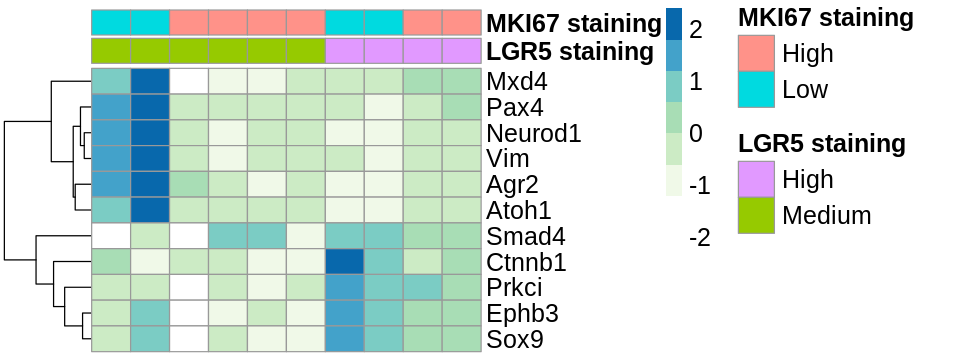

In [104]:
options(repr.plot.width=8, repr.plot.height=3)

pheatmap(log2(mini[genes, rev(colnames(mini))]+1),scale = "row", cluster_cols = F, col = c("white", "white", brewer.pal(6, "GnBu")), annotation_col = df, fontsize = 15, show_colnames = F)

In [ ]:
### APC DOX on and off - cellular differentiation

In [105]:
lt2 = read.csv("~/GSE67186_counts.csv", header= T, stringsAsFactors = F,  sep = "\t", check.names = F)

In [107]:
names = lt2[,1]
lt2 = lt2[, -1]
lt2 = as.matrix(lt2)
rownames(lt2) = names

In [109]:
idx = grep("K", colnames(lt2))
lt = lt2[, -idx]

In [112]:
ren = grep("_RD_", colnames(lt))
ad = grep("_AD_", colnames(lt))
aod = grep("_AOD_", colnames(lt))

In [116]:
colnames(lt)[ren] = "Ren"
colnames(lt)[ad] = "AD"
colnames(lt)[aod] = "AOD"
t = paste(colnames(lt), 1:ncol(lt), sep = "")
colnames(lt)= t
rownames(lt) = toupper(rownames(lt))
dat2 = data.frame(Condition  = c(rep("APC Dox On", 4), rep("APC Dox off",4), rep( "Renilla Dox on", 2)), row.names = t[c( ad, aod, ren)])

In [117]:
goblet = c("PKD1", "MUC2", "AGR2")
neuro = c("NEUROD1","VIM","DCN", "CHGA", "DCLK1","SCGN")
paneth = c("MMP7", "EPHB3", "LYZ1", "DEFA5")
enterocyte = c("RNF43", "KRT23","KCNQ1")
transit = c("CD44", "SOX9", "AXIN2", "CCND1")
stem = c("LGR5", "ASCL2")

nam = c(goblet, neuro, paneth, enterocyte, transit, stem)
length(nam)

dat = data.frame(Cell_markers = c(rep("Goblet", 3),rep("Enteroendocrine", 6), rep("Paneth", 4), rep("Brush/tuft", 3), rep("Transit", 4), rep("Stem", 2)), row.names = nam)
colors  = list(Condition = c(brewer.pal(6, "Accent")[1:3]), Markers =c(brewer.pal(6, "Dark2")))
names(colors[[2]]) = unique(dat[,1])
names(colors[[1]]) = unique(dat2[,1])

[1] 22

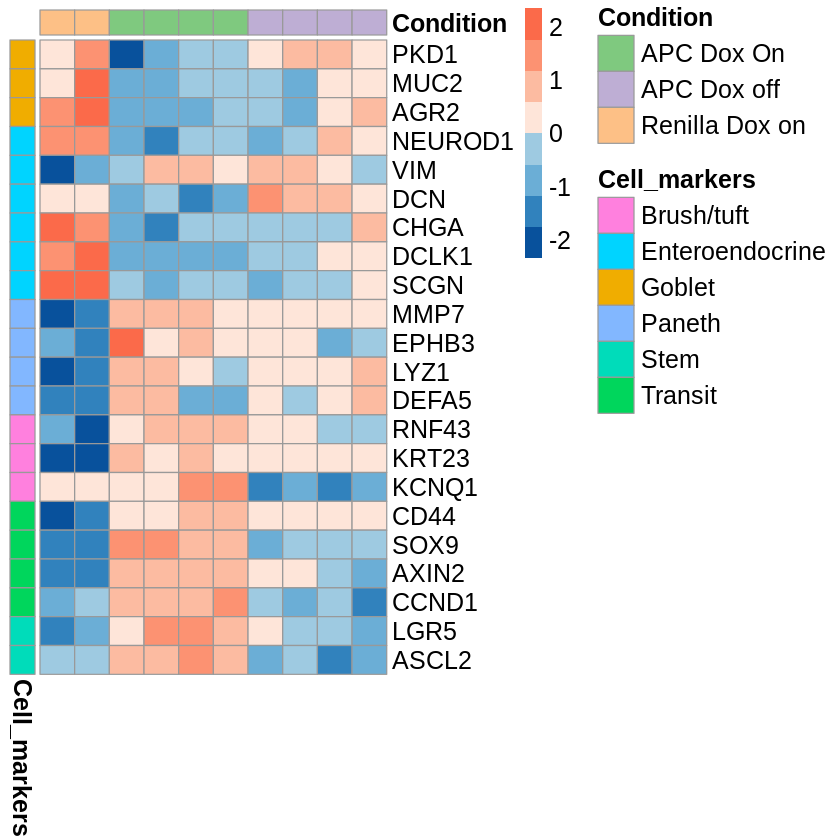

In [118]:
options(repr.plot.width=7, repr.plot.height=7)

pheatmap(log2(lt[rownames(dat), rownames(dat2)[c(10, 9, 1:8)]]+1), show_colnames = F, scale = "row", cluster_rows = F,col = rev(c(rev(brewer.pal(6, "Reds"))[-c(1,2)], brewer.pal(6, "Blues")[-c(1,2)])), fontsize = 15,  cluster_cols = F, annotation_col = dat2, annotation_row = dat, annotation_colors = colors)